# 🔲 Pad and frame

In [ ]:
#| default_exp utils.pad

In [ ]:
# |hide
from nbdev.showdoc import *
from matplotlib import pyplot as plt
from lovely_tensors import monkey_patch

In [ ]:
# |hide
monkey_patch()

In [ ]:
# |hide
# |export
from math import ceil
import torch
from torch.nn.functional import pad

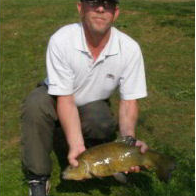

In [ ]:
# |hide
in_stats = { "mean": (0.485, 0.456, 0.406), "std": (0.229, 0.224, 0.225) }

image = torch.load("mysteryman.pt")
image = (image * torch.tensor(in_stats["std"])[:,None,None])
image += torch.tensor(in_stats["mean"])[:,None,None]

image.rgb

In [ ]:
# |export
def pad_frame(t: torch.Tensor,  # 3D+ image tensor, [...,H,W,C]
              frame_px=1,       # Number of pixels to pad each side.
              val :float=0):           # Value to pad with.
    """Pad H and W dimensitons of an image tensor with `val` of thickness `frame_px`"""
    assert t.dim() >= 3
    # Note: `.pad()` counts shape from the last dim when padding.
    return pad(t, (0, 0, frame_px, frame_px, frame_px, frame_px), value=val)

Examples

In [ ]:
pad_frame(torch.zeros((3,3,1)), frame_px=2, val=1).permute(-1,0,1).int().v

tensor[1, 7, 7] n=49 x∈[0., 1.000] μ=0.816 σ=0.391 i32
tensor([[[1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1],
         [1, 1, 0, 0, 0, 1, 1],
         [1, 1, 0, 0, 0, 1, 1],
         [1, 1, 0, 0, 0, 1, 1],
         [1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1]]], dtype=torch.int32)

In [ ]:
# 1px black frame inside 2px white frame (gutter).
pad_frame( pad_frame(torch.ones((3,3,1))), frame_px=2, val=1 ).permute(-1,0,1).int().v

tensor[1, 9, 9] n=81 x∈[0., 1.000] μ=0.802 σ=0.401 i32
tensor([[[1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 0, 0, 0, 0, 0, 1, 1],
         [1, 1, 0, 1, 1, 1, 0, 1, 1],
         [1, 1, 0, 1, 1, 1, 0, 1, 1],
         [1, 1, 0, 1, 1, 1, 0, 1, 1],
         [1, 1, 0, 0, 0, 0, 0, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]]], dtype=torch.int32)

In [ ]:
# |export
def pad_frame_gutters(t: torch.Tensor,  # 3D+ Tensor image tensor, [...,H,W,C]
                      gutter_px=3,      # Write gutter in pixels.
                      frame_px=1):      # Black frame, in pixels
    """Add a black frame and white gutters around an image"""
    assert t.dim() >= 3
    xy_shape = t.shape[-2:]
    # gutter_px = ceil(max(xy_shape)*gutter_frac//2)
    
    # XXX This does not work for RGBA images, as the alpha channel is set to 0!
    t = pad_frame(t, frame_px=frame_px, val=0) # Black frame
    return pad_frame(t, frame_px=gutter_px, val=1) # White gutters between images

Examples

In [ ]:
image

tensor[3, 196, 196] n=115248 x∈[0., 1.000] μ=0.361 σ=0.248

In [ ]:
pad_frame_gutters(image.permute(1, 2, 0), gutter_px=9, frame_px=3)

tensor[220, 220, 3] n=145200 x∈[0., 1.000] μ=0.444 σ=0.335

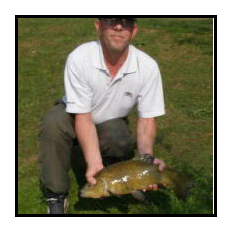

In [ ]:
pad_frame_gutters(image.permute(1, 2, 0), gutter_px=15, frame_px=3).rgb(cl=1)

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()